# data_description.ipynb

---

## **Teilauftrag 2: Datenbeschreibung**

**Autor**: Linhard Zejneli 
**Datum**: 27.03.2025

Dies ist das Jupyter Notebook für Teilauftrag 2. Hier werden statistische Kennzahlen des EA Sports FC 25 Datensatzes ermittelt und visualisiert, ein Ziel-Feld (OVR) definiert sowie das Thema Skalierung angesprochen.




## **1) Ziel-Feld: OVR **

Ich wähle als Ziel das Feld **OVR (Overall Rating)**, das die Gesamtstärke eines Spielers ausdrückt. OVR kombiniert mehrere Leistungsattribute wie Pace (PAC), Shooting (SHO) oder Defense (DEF), was es zu einer idealen Kennzahl macht, um das Leistungsniveau schnell einzuschätzen. Wenn man OVR mithilfe von Teilwerten wie PAC, SHO oder PAS vorhersagen kann, liessen sich Spieler besser miteinander vergleichen oder strategisch in Teams einsetzen. Zudem erlaubt OVR Rückschlüsse darauf, wie stark einzelne Attribute letztlich das Gesamt-Rating beeinflussen und ob es bestimmte Muster zwischen unterschiedlichen Spielerrollen gibt.


## **2) Statistische Kennzahlen **

Um einen Überblick zu bekommen, berechne ich Minimum, Maximum, Mittelwert (Mean), Median und Standardabweichung (Std). Minimum und Maximum decken mögliche Ausreisser auf, während Mean und Median zeigen, ob die Verteilung schief ist (grosse Differenz = ungleichmässig verteilt). Die Standardabweichung verrät, ob die Werte eng beieinander liegen oder stark variieren. Das ist insbesondere bei OVR interessant, wenn man wissen möchte, ob die meisten Spieler in einem ähnlichen Rating-Bereich liegen oder ob es starke Abweichungen gibt. Diese Kennzahlen liefern also eine solide Grundlage, um die Datenverteilung zu verstehen.


In [2]:
# 3) Python-Code für Statistik
import pandas as pd

# Pfad zu meiner Excel Datei
df = pd.read_excel("data/cleaned_fc25_players_bereinigt.xlsx")

# wichtige Spalten
cols = ["OVR", "PAC", "SHO", "PAS", "DRI", "DEF", "PHY", "Age", "Position"]

print("=== STATISTISCHE KENNZAHLEN ===\n")
print(df[cols].describe().round(2))


=== STATISTISCHE KENNZAHLEN ===

            OVR       PAC       SHO       PAS       DRI       DEF       PHY  \
count  17737.00  17737.00  17737.00  17737.00  17737.00  17737.00  17737.00   
mean      66.80     68.24     54.85     59.15     64.21     51.22     65.42   
std        7.03     10.59     13.86      9.83      9.36     16.48      9.47   
min       47.00     29.00     20.00     25.00     29.00     15.00     32.00   
25%       62.00     62.00     46.00     53.00     59.00     37.00     59.00   
50%       67.00     69.00     57.00     60.00     65.00     55.00     66.00   
75%       71.00     75.00     65.00     66.00     70.00     64.00     72.00   
max       91.00     97.00     93.00     94.00     92.00     91.00     91.00   

            Age  
count  17737.00  
mean      25.74  
std        4.64  
min       17.00  
25%       22.00  
50%       25.00  
75%       29.00  
max       44.00  


## **3) Grafik: Histogramm **

Das folgende Histogramm zeigt die Verteilung der OVR-Werte. Auf der x-Achse sind einzelne Rating-Bereiche, während die y-Achse angibt, wie viele Spieler in diesen Bereich fallen. So wird schnell sichtbar, ob sich Ratings um einen gewissen Wert ballen oder ob es mehrere Peaks gibt. Eine zusätzliche Dichtekurve (KDE) glättet die Verteilung und macht Trends leichter erkennbar. Sind viele Spieler in einem ähnlichen Segment, entsteht ein hoher Peak; ragen einzelne Spieler stark heraus, sprechen wir von Ausreissern. Somit erlaubt das Histogramm eine gute erste Einschätzung der Daten.


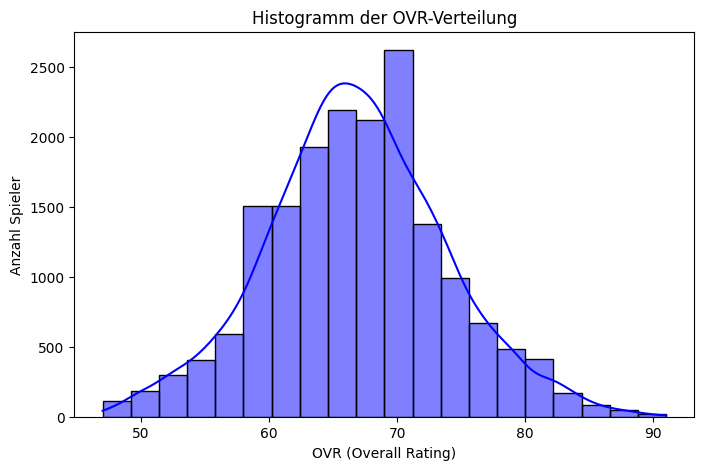

In [6]:
# 4) Code für Histogramm
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="OVR", bins=20, kde=True, color="blue")
plt.title("Histogramm der OVR-Verteilung")
plt.xlabel("OVR (Overall Rating)")
plt.ylabel("Anzahl Spieler")
plt.show()


## Zusätzliche Grafik: Korrelationsmatrix 

Um zu zeigen, in welchem Mass OVR von anderen Attributen abhängt, erstelle ich eine Korrelations-Heatmap. Diese Grafik veranschaulicht, wie eng numerische Variablen wie PAC, SHO, PAS, DRI, DEF oder PHY miteinander verknüpft sind. Ein Korrelationswert nahe +1 bedeutet eine starke positive Beziehung (steigt das eine, steigt das andere), während nahe –1 auf eine gegenläufige Beziehung hindeutet. Werte um 0 zeigen praktisch keine Korrelation. So lässt sich schnell ablesen, ob OVR insbesondere von Schiessen (SHO) oder Verteidigung (DEF) beeinflusst wird und welche Felder möglicherweise redundant sind.


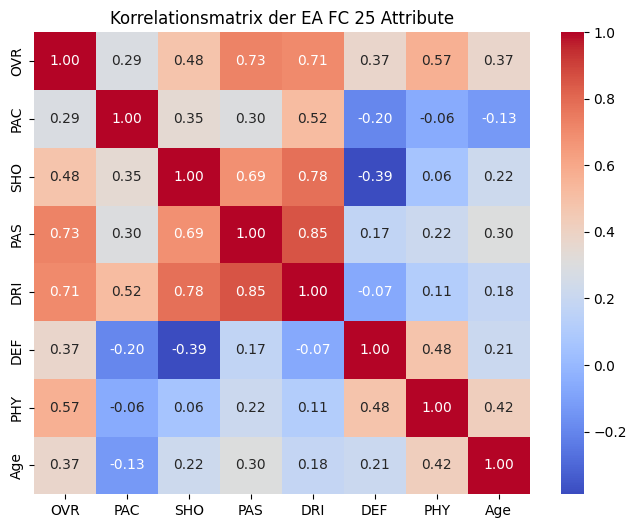

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relevante Spalten (zusammen mit OVR)
corr_cols = ["OVR","PAC","SHO","PAS","DRI","DEF","PHY","Age"]

# Korrelationsmatrix berechnen
corr_matrix = df[corr_cols].corr()

# Grafik erstellen
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der EA FC 25 Attribute")
plt.show()


## Zusammenhang zwischen Position und Attribute 

Um zu prüfen, ob Stürmer (ST) tatsächlich höhere Shooting-Werte (SHO) haben oder Verteidiger (CB) bessere Defense (DEF), erstelle ich einen Vergleich nach Position. Ein Boxplot veranschaulicht dabei die Spannweite der Werte je Position und zeigt Median, Quartile sowie potenzielle Ausreisser. Wenn ST durchschnittlich deutlich höhere SHO-Werte aufweisen, bestätigt das die erwartete Spezialisierung. Umgekehrt lässt sich bei Innenverteidigern (CB) ein Fokus auf Defense erkennen. So kann man im Datensatz herauslesen, ob die Rolle eines Spielers eng mit bestimmten Leistungsmerkmalen verknüpft ist.


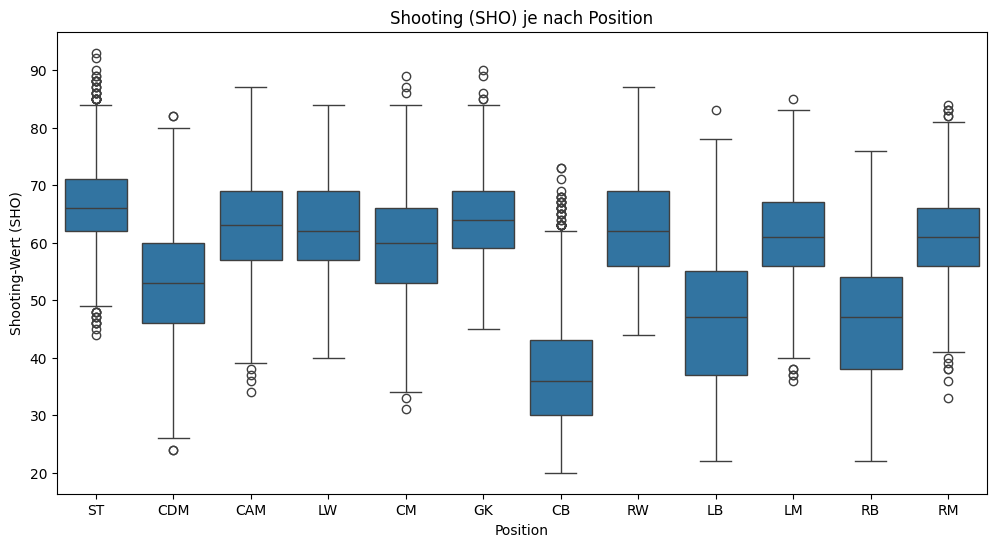

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel: Boxplot von SHO (Shooting) nach Position
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Position", y="SHO")
plt.title("Shooting (SHO) je nach Position")
plt.xlabel("Position")
plt.ylabel("Shooting-Wert (SHO)")
plt.show()


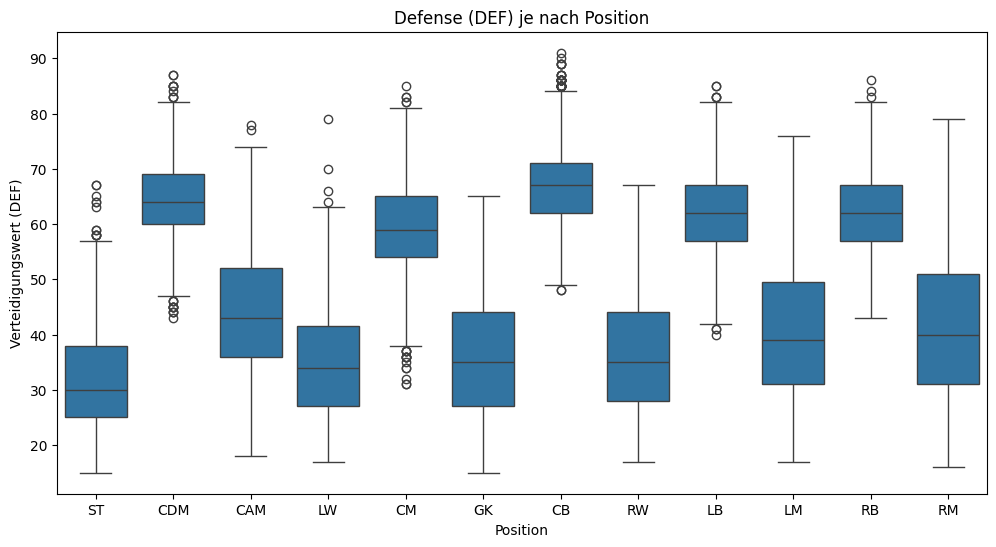

In [14]:
# Boxplot von DEF (Defense) nach Position
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Position", y="DEF")
plt.title("Defense (DEF) je nach Position")
plt.xlabel("Position")
plt.ylabel("Verteidigungswert (DEF)")
plt.show()


## **4) Skalierung **

Bei vielen maschinellen Lernverfahren, die auf Distanzmassen oder Gradienten beruhen (z. B. K-Means, SVM, neuronale Netze), empfiehlt sich eine Skalierung der Attribute. Dadurch verhindert man, dass ein Feature mit grösseren Zahlenbereichen das Modell dominiert. Im Fall der FC 25-Daten liegen die meisten Attribute wie PAC, SHO, DEF zwischen 1 und 99, was schon recht eng ist. Trotzdem kann eine Normalisierung (z. B. MinMax auf [0,1]) helfen, wenn man mehrere Attribute gleichzeitig verwendet. Für baumbasierte Modelle (z. B. Random Forest) ist das jedoch weniger kritisch, weil sie unempfindlich gegenüber unterschiedlichen Skalen sind. Keine grosse Zahlenunterschiede:Attribute (OVR, PAC, SHO usw.) liegen ohnehin im Bereich 1–99.
Tree‐basierte Verfahren: Benötigen keine Skalierung.
Kein starker Ausreisser: Bei ~17k Einträgen mit ähnlichem Wertebereich ist Skalierung nicht zwangsläufig hilfreich.


In [10]:
# 5)  zur Skalierung
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df[["OVR","PAC"]].copy()  # Beispielhaft OVR und PAC

# Wende MinMax-Scaling an
df_scaled[["OVR","PAC"]] = scaler.fit_transform(df_scaled[["OVR","PAC"]])

print("Vor Skalierung (erster Datensatz):")
print(df[["OVR","PAC"]].head())

print("\nNach Skalierung (erster Datensatz):")
print(df_scaled.head())


Vor Skalierung (erster Datensatz):
   OVR  PAC
0   91   97
1   91   66
2   91   88
3   90   80
4   90   95

Nach Skalierung (erster Datensatz):
        OVR       PAC
0  1.000000  1.000000
1  1.000000  0.544118
2  1.000000  0.867647
3  0.977273  0.750000
4  0.977273  0.970588


## Erweiterte Skalierung

Statt nur OVR und PAC skaliere ich hier mehrere Attribute (z. B. OVR, PAC, SHO, DEF). Dadurch liegen alle Werte anschließend im Bereich [0,1]. Das ist vor allem dann hilfreich, wenn ein ML-Verfahren mehrere Felder gleichzeitig nutzt und empfindlich auf unterschiedliche Messskalen reagiert (etwa K-Means oder neuronale Netze). Eine Spalte wie PAC könnte sonst einen grösseren Zahlenbereich haben und das Modell überproportional beeinflussen. Durch MinMax-Scaling ist jede Spalte vergleichbar gewichtet. Für Entscheidungsbäume ist das weniger kritisch, aber für Distanz- oder Gradient-basierte Verfahren fast immer empfehlenswert.


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Beispiel: Wir skalieren OVR, PAC, SHO, DEF
spalten_zu_scalen = ["OVR","PAC","SHO","DEF"]
df_scaled_multi = df[spalten_zu_scalen].copy()

scaler = MinMaxScaler()
df_scaled_multi[spalten_zu_scalen] = scaler.fit_transform(df_scaled_multi[spalten_zu_scalen])

print("Vor Skalierung:")
print(df[spalten_zu_scalen].head())

print("\nNach Skalierung:")
print(df_scaled_multi.head())


Vor Skalierung:
   OVR  PAC  SHO  DEF
0   91   97   90   36
1   91   66   80   87
2   91   88   92   45
3   90   80   87   78
4   90   95   84   29

Nach Skalierung:
        OVR       PAC       SHO       DEF
0  1.000000  1.000000  0.958904  0.276316
1  1.000000  0.544118  0.821918  0.947368
2  1.000000  0.867647  0.986301  0.394737
3  0.977273  0.750000  0.917808  0.828947
4  0.977273  0.970588  0.876712  0.184211


## **5) Zusammenfassung**

- **Ziel-Feld:** OVR, um die Gesamtstärke vorherzusagen  
- **Statistische Kennzahlen:** Min, Max, Mean, Median, Std → geben Einblick in mögliche Ausreisser und Streuung  
- **Histogramm:** Zeigt, wie sich die OVR-Werte über den Wertebereich verteilen und ob es große Peaks oder Ausreißer gibt  
- **Skalierung:** Sinnvoll für bestimmte Algorithmen (z. B. K-Means, SVM), optional bei Entscheidungsbäumen  


